# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

In [7]:
y

array([ 3.43899106e+01,  2.91452677e+02,  2.10513090e+02,  2.47251448e+02,
       -1.23657408e+02, -1.23223790e+02, -1.64467208e+02,  1.24834454e+02,
       -1.84557913e+01,  2.22199080e-01,  4.51836186e+01, -3.11100995e+01,
        3.39252954e+02, -3.10749893e+02,  2.05277932e+02, -1.63810633e+02,
        6.62849682e+01, -2.18515698e+02,  4.21900926e+01,  3.43631894e+02,
       -6.77704457e+01,  1.81420254e+02,  3.19911207e+01,  2.95971322e+01,
        2.25617546e+02, -2.22625983e+02, -6.69220731e+01, -7.69680273e+01,
       -2.72398813e+02, -1.95187174e+02,  4.37760702e+02,  9.48356744e+01,
        1.98362224e+02, -2.13836576e+02, -1.51438948e+02, -6.39726208e+01,
       -2.38708040e+02, -2.10972344e+01, -6.45724463e+01, -1.68435150e+02,
        4.25270991e+01,  1.59609667e+02, -1.96353453e+02,  1.58285179e+02,
       -4.56313773e+02,  1.20847884e+02,  8.22132381e+00, -3.31488252e+01,
        2.29002603e+02,  6.10470242e+00, -2.26152092e+02,  3.83451353e+02,
       -5.78339518e+01, -

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers to....*

absolute magnitude of difference between the predicted value and actual value

* import **mean_absolute_error** from sklearn

In [6]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [8]:
mae_lr = mean_absolute_error(y, y_lr)
mae_rr = mean_absolute_error(y, y_rr)


* According to MAE, what is the better model?

In [12]:
print('Linear regression MAE: ',mae_lr)
print('Ridge regression MAE: ',mae_rr)
if mae_lr > mae_rr:
    print('Linear regression is better.')
else:
    print('Ridge regression is better.')

Linear regression MAE:  8.033545771120119
Ridge regression MAE:  8.033090154916026
Linear regression is better.


____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....*

1 minus the ratio of mean squared error of the model vs. mean squared error of if just using the sample mean.

* import **r2_score** from sklearn

In [13]:
from sklearn.metrics import r2_score

* compute R2

In [14]:
r2_lr = r2_score(y,y_lr)
r2_rr = r2_score(y,y_rr)

* According to R2, what is the better model?

In [15]:
print('Linear regression R2: ',r2_lr)
print('Ridge regression R2: ',r2_rr)
if r2_lr > r2_rr:
    print('Linear regression is better.')
else:
    print('Ridge regression is better.')

Linear regression R2:  0.9974969728468187
Ridge regression R2:  0.9974969632569125
Linear regression is better.


In [16]:
# compare R2 outputs from with `.score()` method

print(lr.score(X,y))
print(rr.score(X,y))

0.9974969728468187
0.9974969632569125


* (Stretch) use predictions from linear regression and compute adjusted R2

In [21]:
def compare_models(lr_evaluation, rr_evaluation):

    if lr_evaluation > rr_evaluation:
        print('Linear regression is better.')
    else:
        print('Ridge regression is better.')
    lr_evaluation = f'{lr_evaluation=}'
    rr_evaluation = f'{rr_evaluation=}'
    print(lr_evaluation)
    print(rr_evaluation)


In [23]:
# Resource: https://www.statology.org/adjusted-r-squared-in-python/
#display adjusted R-squared

def r2a(X,y):
    # Perform linear regression
    lr = LinearRegression()
    lr.fit(X,y)

    # Perform ridge regression
    rr = Ridge(alpha=0.1)
    rr.fit(X,y)

    # Obtain r^2 values for each model
    r2a_lr = 1 - (1-lr.score(X,y)* len(y)-1)/(len(y)-X.shape[1]-1)
    r2a_rr = 1 - (1-rr.score(X,y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    # 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
    compare_models(r2a_lr, r2a_rr)


r2a(X,y)

Linear regression is better.
lr_evaluation=2.008591479117107
rr_evaluation=0.9974716544930795


________________________________
## Classification evaluation

In [24]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, RidgeClassifier

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

(1000, 10)
(1000,)


## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....*

Number of true positives divided by number of total identified positives (false + true positives)

* import **precision_score** from sklearn

In [25]:
from sklearn.metrics import precision_score

* compute precision

In [27]:
precision_lr = precision_score(y, y_lr)
precision_rr = precision_score(y, y_rr)

* print precision

In [28]:
compare_models(precision_lr, precision_rr)

Ridge regression is better.
lr_evaluation=0.890020366598778
rr_evaluation=0.899581589958159


## Recall score

**Write the definition to the Recall score below and how to interpret it?**
> *The Recall score refers too....*

True positives divided by all actual positives.

* import **recal_score** from sklearn

In [30]:
from sklearn.metrics import recall_score

* compute recall

In [31]:
recall_lr = recall_score(y, y_lr)
recall_rr = recall_score(y, y_rr)

* print recall

In [32]:
compare_models(recall_lr, recall_rr)

Linear regression is better.
lr_evaluation=0.8705179282868526
rr_evaluation=0.8565737051792829


## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers too....*

Receiver operator characteristic. Plot of false positive rate on x-axis vs. true positive rate on y-axis. Perfect score is area under curve of 1.

* import **roc_curve** from sklearn

In [33]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [38]:
print(y_lr[0:10])
print(y_rr[0:10])
print(y[0:10])

[0 0 1 0 0 1 1 1 1 0]
[0 0 1 0 0 1 1 1 1 0]
[1 0 1 0 0 1 1 1 1 0]


* import matplotlib 

In [41]:
lr.predict_proba(X)

array([[0.94574728, 0.05425272],
       [0.74234157, 0.25765843],
       [0.26816265, 0.73183735],
       ...,
       [0.1452936 , 0.8547064 ],
       [0.16462787, 0.83537213],
       [0.66869792, 0.33130208]])

In [48]:
print(rr.decision_function(X).shape)
rr.decision_function(X)

(1000,)


array([-6.69971158e-01, -3.18793054e-01,  1.29305761e-01, -6.76108721e-01,
       -1.27620244e+00,  7.72511027e-01,  4.19759774e-01,  9.33672755e-01,
        2.88309043e-01, -4.20463971e-01, -3.92189017e-01,  7.05763189e-02,
       -6.30137325e-01,  9.97727733e-01, -9.75857830e-01, -4.83705381e-01,
       -8.28449222e-02, -5.90294900e-01,  7.25622184e-03, -9.86157482e-01,
        7.68968138e-01, -7.36377128e-01,  1.02040608e+00, -1.09249918e+00,
       -1.32947815e+00, -5.36754953e-01,  9.14899278e-01,  1.57907048e+00,
        2.68861410e-01, -3.25440983e-01, -5.68339861e-01, -2.47297509e-01,
        6.73526932e-01,  8.54728418e-01, -7.77846250e-01, -1.05064360e+00,
       -7.04482814e-01,  8.86563241e-01, -6.96570093e-01, -5.86626662e-01,
        1.01554443e+00, -4.42367606e-01, -3.41223008e-01,  1.36052129e+00,
        3.10469673e-01,  1.59033759e-01,  3.62417901e-01,  1.02724162e+00,
        5.76156530e-01, -7.73541423e-01,  2.10424093e-01,  9.33317482e-01,
       -1.11738648e+00,  

In [45]:
roc_lr = roc_auc_score(y, lr.predict_proba(X)[:, 1])
roc_rr = roc_auc_score(y, rr.decision_function(X))
compare_models(roc_lr, roc_rr)

Ridge regression is better.
lr_evaluation=0.9550032800524808
rr_evaluation=0.955023280372486


* plot ROC

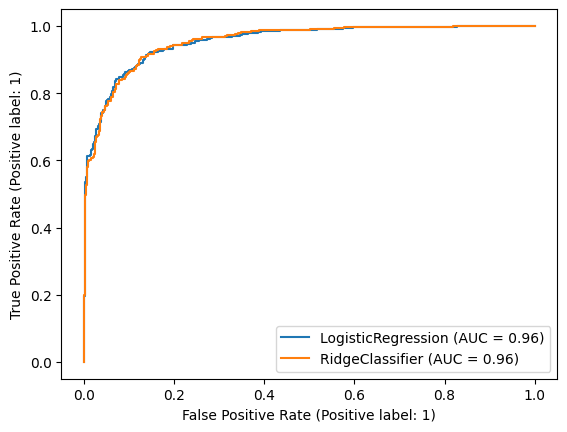

In [52]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(lr, X, y, ax=ax)
RocCurveDisplay.from_estimator(rr, X, y, ax=ax)

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*

negative log-likelihood of a logistic model 

[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html?highlight=log_loss#sklearn.metrics.log_loss)

* import **log_loss** from sklearn

In [53]:
from sklearn.metrics import log_loss

* compute log_loss

* print log_loss

In [55]:
lr.predict_proba(X).shape

(1000, 2)

In [54]:
ll_lr = log_loss(y, lr.predict_proba(X))
ll_rr = roc_auc_score(y, rr.decision_function(X))
compare_models(ll_lr, ll_rr)

Ridge regression is better.
lr_evaluation=0.2719465745792999
rr_evaluation=0.955023280372486


#### Q: According to metrics above, which one is the better model?